In [1]:
# use the cell below to ensure correct relative imports
# you must be in the qcore directory

In [2]:
cd ../qcore

C:\Users\qcrew\Desktop\qcore\qcore


### Proto-user guide for interacting with the Sa124 in qcore

- Each cell has comments that tell you how to use the sa124 driver. Use this notebook until we come up with a better user guide...

In [3]:
# import sa124 driver
from instruments import Sa124

In [4]:
# proper instantiation
# first two args to __init__() are compulsory
# other four args are optional, if not given, will be set to default values
# recommendation - let rbw and ref_power be default, only worry about setting center and span

sa = Sa124(name='sa', serial_number=19184645, center=6e9, span=500e6, rbw=250e3, ref_power=0)

Trying to initialize sa, will take about 5s...
Connnected to SA124B 19184645
Configured sweep! Sweep info: 
{'start': '5.7501000E+09', 'center': '6.0000000E+09', 'span': '5.000E+08', 'sweep_length': 2500, 'rbw': '2.500E+05', 'ref_power': 0, 'bin_size': '2.000E+05'}


In [6]:
# trying to instantiate an sa with an invalid serial number

# running this will throw a runtime error
#sa_does_not_exist = Sa124(name='sa_dne', serial_number=999)

In [8]:
# trying to instantiate an sa that is already open
# PLEASE DO NOT DO THIS - ITS BAD PRACTICE TO REUSE THE SA LIKE THIS

# running this will still allow you to talk to the already open sa but will issue a warning
#duplicate_sa = Sa124(name='sa', serial_number=19184645, center=6e9, span=500e6, rbw=250e3, ref_power=0)

In [9]:
# let's query the sa's parameters
sa.parameters
# out of these parameters, 'center', 'span', 'rbw', and 'ref_power' can be set by us
# the other three are automatically calculated by the SA and cannot be set by us exactly
# for MOST sweeps, we only need to care about setting 'center' and 'span', the default rbw value is good enough

{'start': '5.7501000E+09',
 'center': '6.0000000E+09',
 'span': '5.000E+08',
 'sweep_length': 2500,
 'rbw': '2.500E+05',
 'ref_power': 0,
 'bin_size': '2.000E+05'}

In [10]:
# say we are happy with the current sweep parameters
# let's now open a connection to a labbrick and set it at the same freq as sa's current center
from instruments import LabBrick

# please update the serial_number if you're using a different labbrick
lb = LabBrick(name='lb', serial_number=25331, frequency=6e9, power=0)

Trying to initialize lb
Connnected to LabBrick 25331
Setting initial parameters...
Successfully set frequency to 6.0000000E+09
Successfully set power to 0
LabBrick is ready to use.


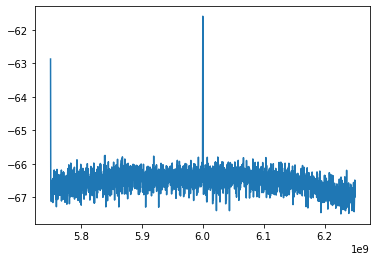

In [11]:
# let's get a sweep and plot it
import matplotlib.pyplot as plt

freqs, amps = sa.sweep()
plt.plot(freqs, amps)

Successfully set frequency to 6.0000000E+09
Configured sweep! Sweep info: 
{'start': '5.5001000E+09', 'center': '6.0000000E+09', 'span': '1.000E+09', 'sweep_length': 5000, 'rbw': '2.500E+05', 'ref_power': 0, 'bin_size': '2.000E+05'}


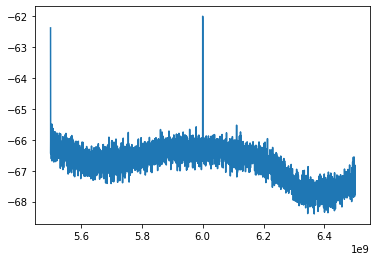

In [12]:
# say we now want to change our sweep parameters, we simply pass the new parameters to sweep()
# to recap, valid sweep parameters that we can set are 'center', 'span', 'rbw', and 'ref_power'
lb.frequency = 6e9 # set labbrick freq to a new value
freqs, amps = sa.sweep(center=6e9, span=1e9) # change sweep parameters
plt.plot(freqs, amps)
# the rbw and ref_power retain their last configured value

Configured sweep! Sweep info: 
{'start': '5.9001000E+09', 'center': '6.0000000E+09', 'span': '2.000E+08', 'sweep_length': 1000, 'rbw': '2.500E+05', 'ref_power': 0, 'bin_size': '2.000E+05'}


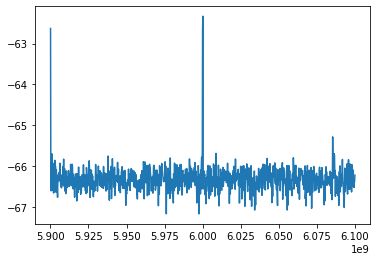

In [13]:
# let's try another sweep with different span (center remains unchanged), just to drive the point home
freqs, amps = sa.sweep(span=200e6) # change sweep parameters
plt.plot(freqs, amps)
# once we are happy with our sweep parameters, we simply run sa.sweep() subsequently, without passing in any arguments!

In [17]:
# now, let's try to be sneaky and pass in some ridiculous values

# running this code will throw a value error and inform you of the valid values for center
#freqs, amps = sa.sweep(center=40e9) # some ridiculous center value
#plt.plot(freqs, amps)

# similarly, value errors will be thrown for spans smaller than 1Hz
# any ref_powers over 20 dBm will be clamped to 20 dBm (which is the max possible ref_power on this device)

Bad RBW value given, rbw set to default 250000.0
Configured sweep! Sweep info: 
{'start': '5.7501000E+09', 'center': '6.0000000E+09', 'span': '5.000E+08', 'sweep_length': 2500, 'rbw': '2.500E+05', 'ref_power': 0, 'bin_size': '2.000E+05'}


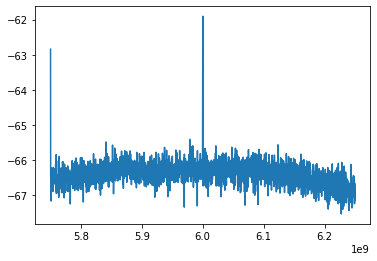

In [18]:
# the valid values for rbw are a little difficult to explain, it depends on other parameters e.g. start_freq and span
# you can refer to the driver .py script or the manual for the exact range of valid values for rbw
# but rest assured that if you try to enter an invalid rbw,
# you'll get a warning and the rbw will be set to the default value of 250e3

# let's try to enter an invalid rbw
freqs, amps = sa.sweep(center=6e9, span=500e6, rbw=500e3) # invalid rbw
plt.plot(freqs, amps)

In [19]:
# disconnect sa

sa.disconnect()

sa disconnected!


In [21]:
# after disconnecting, trying to talk to the sa will throw a runtime error
#sa.parameters